<a href="https://colab.research.google.com/github/GeraldL19/loan_default_prediction/blob/main/Loan_default_trial_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
pip install --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 85.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.6 MB/s 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pycaret.classification as pyc
from pycaret.classification import *

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Loan_default.csv")
df = df.drop('LoanID', axis=1)
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [1]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [4]:
from sklearn.preprocessing import LabelEncoder

In [8]:
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
df['Education'] = labelencoder.fit_transform(df['Education']) #fitting and transforming the desired categorical column.
df['EmploymentType'] = labelencoder.fit_transform(df['EmploymentType'])
df['MaritalStatus'] = labelencoder.fit_transform(df['MaritalStatus'])
df['HasMortgage'] = labelencoder.fit_transform(df['HasMortgage'])
df['HasDependents'] = labelencoder.fit_transform(df['HasDependents'])
df['LoanPurpose'] = labelencoder.fit_transform(df['LoanPurpose'])
df['HasCoSigner'] = labelencoder.fit_transform(df['HasCoSigner'])

In [11]:
from sklearn.preprocessing import StandardScaler
cols_to_norm = ['Age','Income','LoanAmount','CreditScore','MonthsEmployed','NumCreditLines','InterestRate','LoanTerm','DTIRatio']
df[cols_to_norm] = StandardScaler().fit_transform(df[cols_to_norm])

In [12]:
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,0.833990,0.089693,-1.086833,-0.341492,0.590533,1.341937,0.261771,-0.001526,-0.260753,0,0,0,1,1,4,1,0
1,1.701221,-0.823021,-0.044309,-0.731666,-1.285731,-1.343791,-1.308350,1.412793,0.778585,2,0,1,0,0,4,1,0
2,0.166888,0.043854,0.022715,-0.775718,-0.968209,0.446694,1.156831,-0.708685,-0.823728,2,3,0,1,1,0,0,1
3,-0.767053,-1.303452,-1.168538,1.061875,-1.718715,0.446694,-0.967805,-0.708685,-1.170174,1,0,1,0,0,1,0,0
4,1.100830,-1.592855,-1.671921,0.369631,-1.487790,1.341937,-1.052188,0.705634,0.995114,0,3,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,-1.634285,-1.142632,1.173101,-0.209337,1.427636,1.341937,0.093006,-1.415845,1.514783,0,0,1,0,0,4,0,0
255343,-0.767053,-0.783984,0.879724,-0.398130,-1.314597,-0.448549,-0.292744,-0.708685,-1.256785,1,1,0,0,0,3,0,1
255344,0.833990,0.059562,1.139391,0.143078,0.301877,0.446694,-1.236022,1.412793,-0.000918,1,2,1,1,1,0,1,0
255345,-0.099952,0.066979,-0.945840,1.477221,-0.564091,-1.343791,1.116146,0.705634,-0.260753,1,1,2,1,1,4,0,0


In [25]:
s = setup(df, target = 'Default', train_size = 0.7)

best = compare_models()

,Description,Value
0,Session id,6191
1,Target,Default
2,Target type,Binary
3,Original data shape,"(255347, 17)"
4,Transformed data shape,"(255347, 17)"
5,Transformed train set shape,"(178742, 17)"
6,Transformed test set shape,"(76605, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8862,0.7513,0.0655,0.5894,0.1178,0.0969,0.1688,7.6680
gbc,Gradient Boosting Classifier,0.8861,0.7519,0.0498,0.6227,0.0922,0.0763,0.1530,46.6560
rf,Random Forest Classifier,0.8857,0.7279,0.0471,0.5987,0.0873,0.0716,0.1445,48.8440
ada,Ada Boost Classifier,0.8854,0.7455,0.0492,0.5774,0.0906,0.0737,0.1435,10.2110
qda,Quadratic Discriminant Analysis,0.8853,0.7490,0.0298,0.6288,0.0568,0.0468,0.1188,0.3840
lr,Logistic Regression,0.8851,0.7449,0.0311,0.5982,0.0591,0.0482,0.1171,0.9680
lda,Linear Discriminant Analysis,0.8851,0.7448,0.0272,0.6162,0.0520,0.0426,0.1118,0.5940
et,Extra Trees Classifier,0.8851,0.7295,0.0222,0.6615,0.0430,0.0356,0.1062,28.2960
nb,Naive Bayes,0.8848,0.7465,0.0166,0.6546,0.0323,0.0267,0.0911,0.1600
xgboost,Extreme Gradient Boosting,0.8846,0.7364,0.0847,0.5198,0.1456,0.1169,0.1749,2.5540


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [18]:
x = df.drop('Default', axis=1)
y = df['Default']

In [19]:
from sklearn.model_selection import train_test_split
# i.e. 70 % training dataset and 30 % test datasets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, shuffle=True)

In [20]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
y_pred = rf.predict(X_test)

In [29]:
recall = recall_score(y_test, y_pred)
print("recall:", recall)

recall: 0.045556805399325086


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

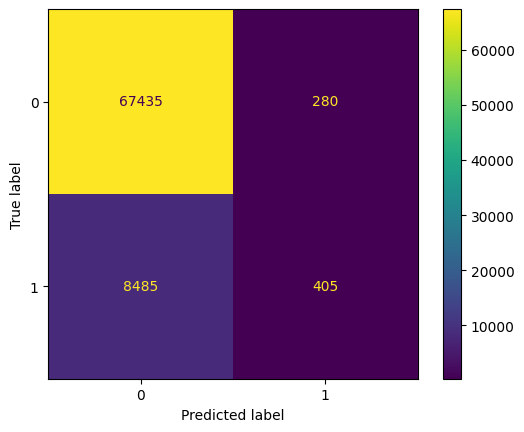

In [23]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();